# Import the Libraries

In [2]:
import numpy as np    # Linear Algebra
import pandas as pd   # Data Processing and Manipulation

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import scale, StandardScaler, normalize

# For predictive models
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# For Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

# Read the Dataset

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Online Retail II/online_retail_II.xlsx")

In [4]:
# Reading the first 5 rows of data

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Checking the shape the data

data.shape

(525461, 8)

In [6]:
# checking the data-types of the data

data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [7]:
# checking if there is any NULL values present in the data

data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df_null = round(100*(data.isnull().sum())/len(data), 2)
df_null

Invoice         0.00
StockCode       0.00
Description     0.56
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    20.54
Country         0.00
dtype: float64

It appears that 20.54% of the customer ids are missing and 0.56% Description is missing which is very problematic. So , we are trying to drop those rows where CustomerIDs in NA.

In [9]:
#remove rows where customerID are NA
data.dropna(subset=['Customer ID'],how='all',inplace=True)

In [10]:
#remove rows where Description are NA
data.dropna(subset=['Description'],how='all',inplace=True)

In [11]:
data.shape

(417534, 8)

In [12]:
# checking how many unique customer IDs are there

x = data['Customer ID'].nunique()

# printing the value
print("There are {} number of different customers".format(x)) 

There are 4383 number of different customers


In [13]:
# checking different number of unique countries present in this dataset

x = data['Country'].nunique()

# printing the result
print("There are {} number of different countries who do online retailing from UK".format(x))

There are 37 number of different countries who do online retailing from UK


In [14]:
data.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


From descriptive statistics of quantitative variables (Quantity and UnitPrice), we could see that there are negative values in the Quantity , which are not possible values for quantity and there are many 0's in Price which is not possible as well.

Let's have a closer look on the reason of negative values and zeros in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Cancelled transactions is indicated by invoice which starts with letter 'c'. Probably transactions with negative values of quantity are cancelled.

Now, Filtering transaction with invoice started with letter 'C':

In [15]:
cancelled = data[data['Invoice'].astype(str).str.contains('C')]
cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [16]:
cancelled[cancelled['Quantity']>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


Among cancelled transactions ther are not any transaction with positive quantity.

In [17]:
data[data['Description'] == ' ']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [18]:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(data)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(data[data['Price']<=0])/len(data)*100, 2),"%")

Percentage of cancelled transactions: 2.36 %
Precentage of transactions with zero or negative price 0.01 %


In [19]:
data[data['Price'] == 0].shape

(31, 8)

In [20]:
data = data[(data['Quantity']>0)]

In [21]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
data.shape

(407695, 8)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [24]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [25]:
# Now check and remove duplicate items

print('Duplicate entries: {}'.format(data.duplicated().sum()))

Duplicate entries: 6748


In [26]:
data.drop_duplicates(inplace = True)

In [27]:
data.shape

(400947, 8)

In [31]:
#exploring the unique values of each attribute
print("Number of transactions: ", data['Invoice'].nunique())
print("Number of products bought: ",data['StockCode'].nunique())
print("Number of unique Description:", data['Description'].nunique() )
print("Percentage of customers NA: ", round(data['Customer ID'].isnull().sum() * 100 / len(data),2),"%" )

Number of transactions:  19215
Number of products bought:  4017
Number of unique Description: 4444
Percentage of customers NA:  0.0 %


In [30]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    3107
REGENCY CAKESTAND 3 TIER              1696
STRAWBERRY CERAMIC TRINKET BOX        1372
ASSORTED COLOUR BIRD ORNAMENT         1355
HOME BUILDING BLOCK WORD              1192
                                      ... 
PINK BEADS+HAND PHONE CHARM              1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
CAT W SUNGLASSES BLANK CARD              1
RED STONE/CRYSTAL EARRINGS               1
NUMBER TILE VINTAGE FONT, 3              1
Name: Description, Length: 4444, dtype: int64

# NLP - attempt to categorize the product descriptions and find a label

In [36]:
import spacy
from collections import defaultdict
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en')
from collections import Counter

In [37]:
tmp = data.Description

In [38]:
frank = []
for i in tmp[:100]:
    frank.append(i)

In [39]:
word_count = list()
entities = list()

pos_counts = defaultdict(Counter)
nlp.max_length = 20000000
doc = nlp(str(frank))

# count tokens, excluding stop words
for token in doc:
    for word in STOP_WORDS:
        if str(token) == str.lower(word):
            pos_counts[token.pos][token.orth] = 0
        else:
            pos_counts[token.pos][token.orth] += 1

for pos_id, counts in sorted(pos_counts.items()):
    pos = doc.vocab.strings[pos_id]
    for orth_id, count in counts.most_common():
        word_count.append([pos, count, doc.vocab.strings[orth_id],doc.ents])

for ent in doc.ents:
    entities.append([ent.text, ent.start_char, ent.end_char, ent.label_])

In [40]:
entities = pd.DataFrame(entities)
entities[3].unique()
entities.head(20)

,0,1,2,3
0,15CM,2,6,CARDINAL
1,20,28,30,CARDINAL
2,PINK CHERRY LIGHTS',41,60,ORG
3,WHITE CHERRY LIGHTS',64,84,ORG
4,RECORD FRAME 7,87,101,WORK_OF_ART
5,STRAWBERRY CERAMIC TRINKET BOX',119,150,WORK_OF_ART
6,SAVE THE PLANET MUG',183,203,WORK_OF_ART
7,'FANCY FONT HOME SWEET HOME DOORMAT',205,241,WORK_OF_ART
8,'CAT BOWL ',243,254,WORK_OF_ART
9,'DOG BOWL,256,265,WORK_OF_ART


In [41]:
word_count = pd.DataFrame(word_count)
word_count = word_count[~word_count[0].isin(['PUNCT','SPACE','ADP','NUM','DET','ADJ'])]
word_count.sort_values([1], ascending=False,inplace=True)

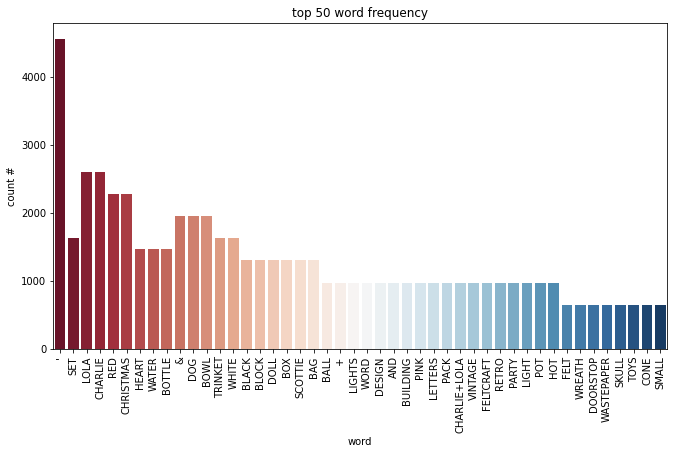

In [42]:

# plot top (n) word occurrances
f, ax = plt.subplots(figsize=(11, 6))

tmp = word_count.head(50)

g=sns.barplot(x=tmp[2],y=tmp[1],data=tmp,palette="RdBu", ci=None)
g.set(xlabel='word', ylabel='count #',title="top 50 word frequency");
for item in g.get_xticklabels():
    item.set_rotation(90)

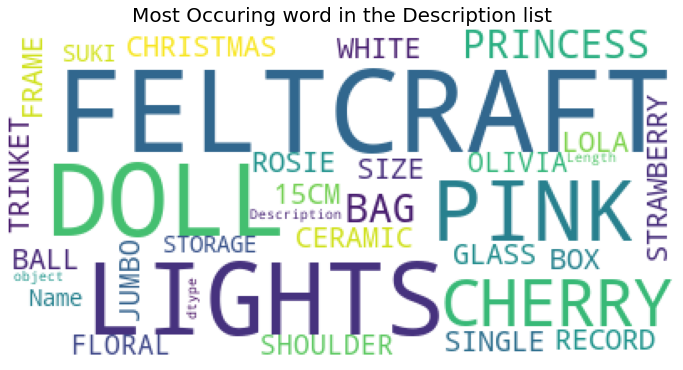

In [43]:

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

NLP isn't providing a huge amount of information to categorise items at this time...

# Exploratory Data Analysis

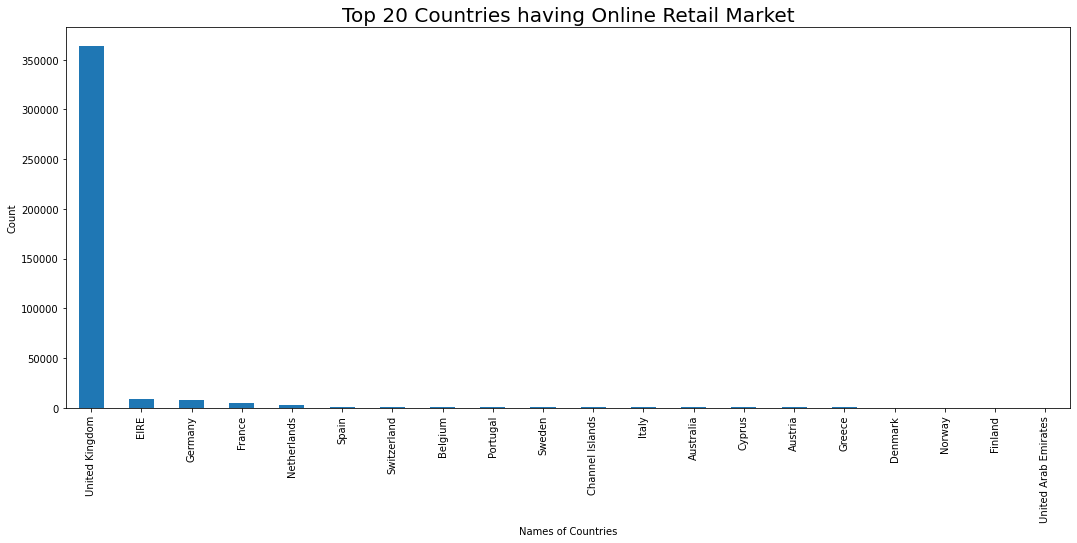

In [46]:
# checking the different values for country in the dataset

data['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

The most unique customers are from United Kingdom, for this reason it is better to concetrate on UK for customer segmentation.



In [47]:
customer_country=data[['Country','Customer ID']].drop_duplicates()
customer_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
34,United Kingdom,3971
12,Germany,67
11,France,47
28,Spain,25
21,Netherlands,22
25,Portugal,18
3,Belgium,17
29,Sweden,16
0,Australia,15
30,Switzerland,14


In [48]:
#create a new column called date which contains the only the date of invoice
data['date'] = data['InvoiceDate'].dt.date

In [49]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



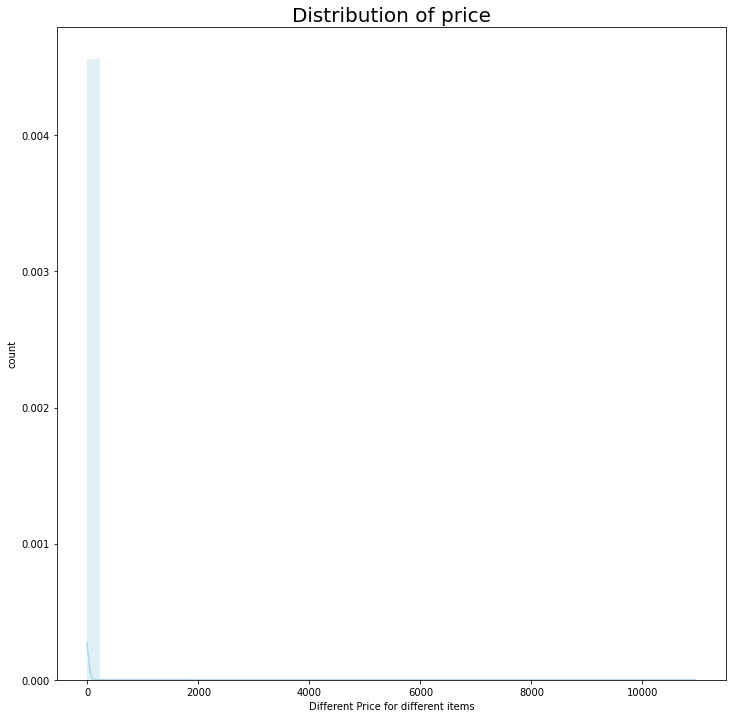

In [50]:
# visualizing the unitprice

sns.distplot(data['Price'], color = 'lightblue')
plt.title('Distribution of price', fontsize = 20)
plt.xlabel('Different Price for different items')
plt.ylabel('count')
plt.show()

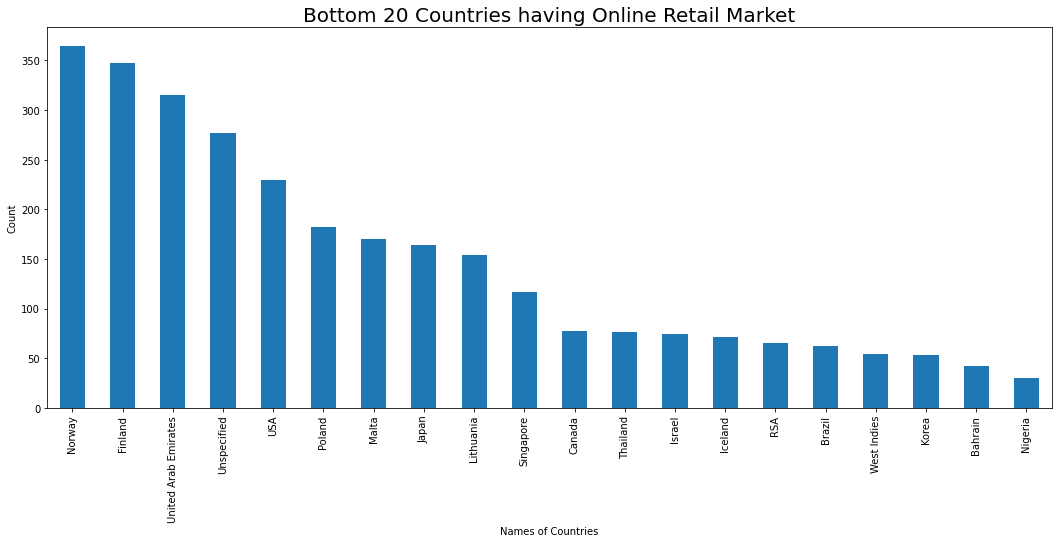

In [51]:
# checking the different values for country in the dataset

data['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [52]:
# checking how many quantity of products have been sold online from each country

data['Quantity'].groupby(data['Country']).agg('sum')

Country
Australia                 20189
Austria                    6697
Bahrain                     495
Belgium                   12069
Brazil                      189
Canada                      894
Channel Islands           11991
Cyprus                     4610
Denmark                  229690
EIRE                     181413
Finland                    3671
France                   162048
Germany                  108633
Greece                     6167
Iceland                     828
Israel                     1132
Italy                      7364
Japan                      7311
Korea                       700
Lithuania                  2306
Malta                      1549
Netherlands              183679
Nigeria                     103
Norway                     7867
Poland                     2144
Portugal                  11988
RSA                         591
Singapore                  1753
Spain                     22841
Sweden                    52417
Switzerland               22255


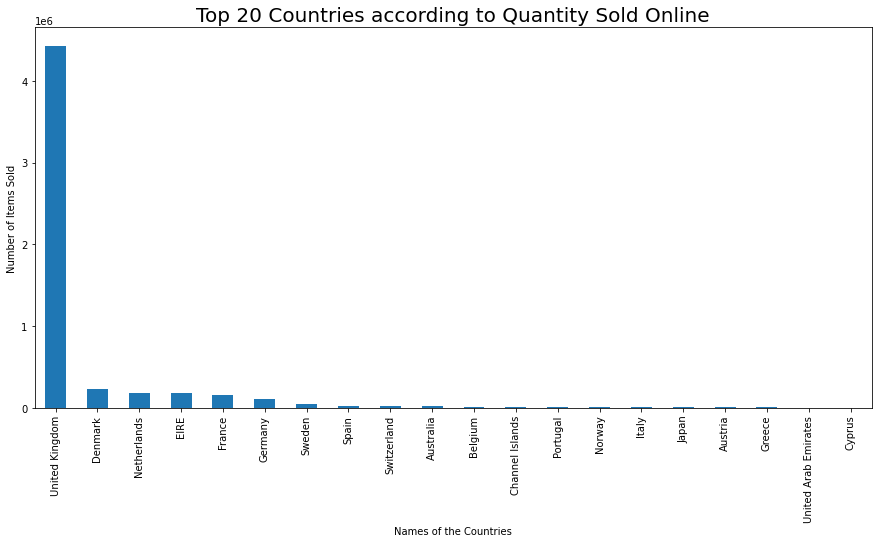

In [53]:
# Having a look at the top 20 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

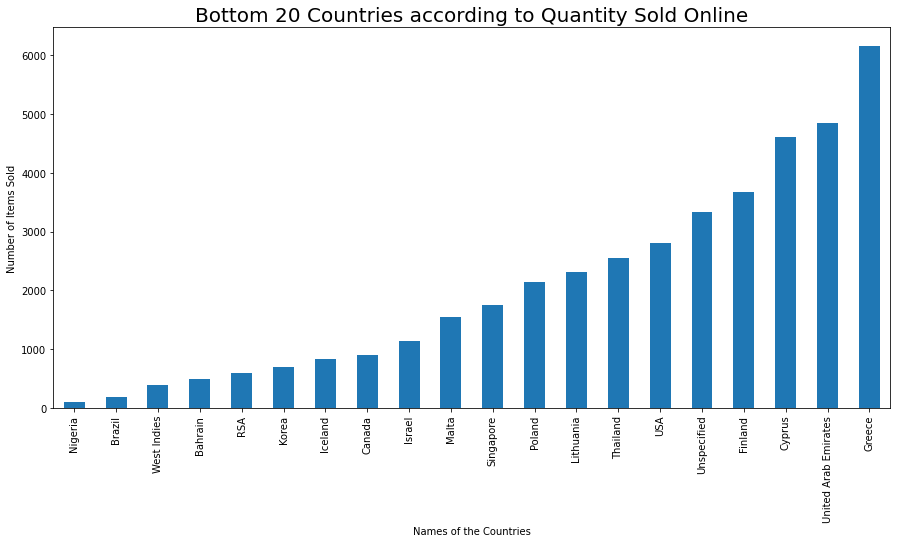

In [54]:

# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

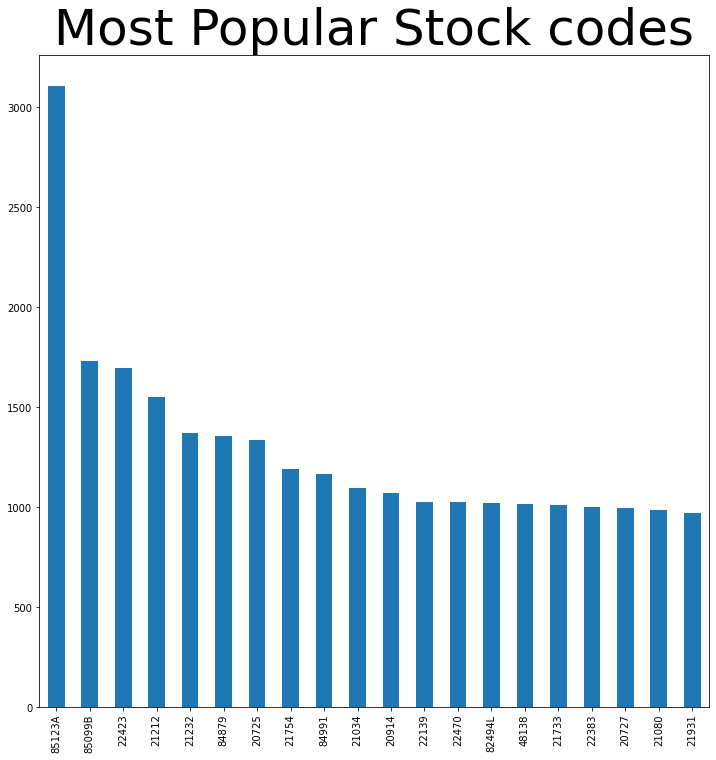

In [55]:
# looking the stockcode for the datset

data['StockCode'].value_counts().head(20).plot.bar()
plt.title('Most Popular Stock codes', fontsize = 50)
plt.show()

# Time Features

In [56]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [57]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01


In [58]:
data['Year'] = data["InvoiceDate"].apply(lambda x: x.year)
data['Month'] = data["InvoiceDate"].apply(lambda x: x.month)
data['MonthYear'] = data["InvoiceDate"].apply(lambda x: x.strftime("%B %Y"))
data['Weekday'] = data["InvoiceDate"].apply(lambda x: x.weekday())
data['Day'] = data["InvoiceDate"].apply(lambda x: x.day)
data['Hour'] = data["InvoiceDate"].apply(lambda x: x.hour)

In [59]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,Year,Month,MonthYear,Weekday,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7


In [88]:
data.shape

(400947, 16)

In [61]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,Year,Month,MonthYear,Weekday,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009,12,December 2009,1,1,7


# RFM Analysis

**WHAT IS RFM ANALYSIS?**

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary).

RFM can also be understood as a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

*   Recency – How recently did the customer purchase?
*   Frequency – How often do they purchase?
*   Monetary Value – How much do they spend?







To evaluate the Monetary values at customer level we wil requires the total amount for each purchses. 

In [62]:
#Adding new columns as total amount
data['TotalAmount'] = data['Price']*data['Quantity']

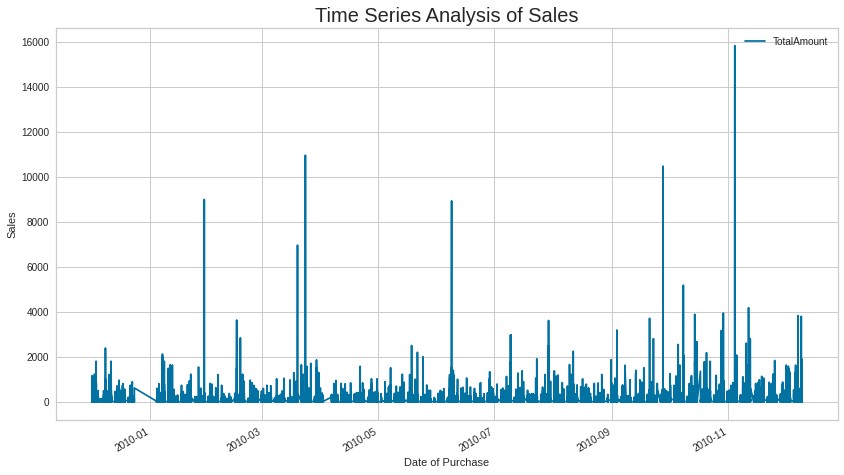

In [90]:
# let's look at Sales vs Invoicedate (Time series Analysis)

plt.rcParams['figure.figsize'] = (14, 8)
data.plot(x = 'InvoiceDate', y = 'TotalAmount')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

Till Here we have done the data cleaning and preprocessing parts. And data is good to use.

In [95]:
import datetime as dt

In [96]:
# For recency will check what was the last date of transaction
#First will convert the InvoiceDate as date variable
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

So the last date was 2010-12-09 for transaction. So will take latest date for benchmark as 2010-12-10, for the calculation of the Recency.

In [97]:
#RFM factors calculation:
Latest_date = dt.datetime(2010,12,10)
RFM_data = data.groupby('Customer ID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'Invoice' : 'count','TotalAmount' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'Invoice' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,164,33,372.86
1,12347.0,2,71,1323.32
2,12348.0,73,20,222.16
3,12349.0,42,102,2671.14
4,12351.0,10,21,300.93


In [98]:
# RFM_data Description/ Summary
RFM_data.iloc[:,1:4].describe()

,Recency,Frequency,Monetary
count,4314.000000,4314.000000,4314.000000
mean,90.269819,92.940890,2039.460766
std,96.944304,198.883579,8909.797773
min,0.000000,1.000000,0.000000
25%,17.000000,18.000000,307.105000
50%,52.000000,43.000000,700.405000
75%,135.000000,100.000000,1713.297500
max,373.000000,5568.000000,349164.350000


From above result, we can observe that average recency of the customers are 90 days (approx), an average customer are purchasing the product 93 times and spending an average 2039.46 price.



**Segmentation:**

In [99]:
#Here, we will divide the data set into 4 parts based on the quantiles.
quantiles = RFM_data.drop('Customer ID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Frequency': {0.25: 18.0, 0.5: 43.0, 0.75: 100.0},
 'Monetary': {0.25: 307.105, 0.5: 700.4050000000001, 0.75: 1713.2974999999997},
 'Recency': {0.25: 17.0, 0.5: 52.0, 0.75: 135.0}}

In [100]:
#Creating the R,F and M scoring/segement function
#[1] Recency scoring (Negative Impact : Higher the value, less valuable)

def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

In [101]:
#Scoring:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,164,33,372.86,4,3,3
1,12347.0,2,71,1323.32,1,2,2
2,12348.0,73,20,222.16,3,3,4
3,12349.0,42,102,2671.14,2,1,1
4,12351.0,10,21,300.93,1,3,4


In [102]:
#Now we will create : RFMGroup and RFMScore
RFM_data['RFM_Group'] = RFM_data['R_score'].astype(str) + RFM_data['F_score'].astype(str) + RFM_data['M_score'].astype(str)

#Score
RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,12346.0,164,33,372.86,4,3,3,433,10
1,12347.0,2,71,1323.32,1,2,2,122,5
2,12348.0,73,20,222.16,3,3,4,334,10
3,12349.0,42,102,2671.14,2,1,1,211,4
4,12351.0,10,21,300.93,1,3,4,134,8


In [103]:
RFM_data.shape

(4314, 9)

RFM Scores have been calculated now we will use this score to make segments of the customers and define level of loyality.

In [107]:
#Classification based on these scores

print("Best Customers: ",len(RFM_data[RFM_data['RFM_Group']=='111']))
print('Loyal Customers: ',len(RFM_data[RFM_data['F_score']==1]))
print("Big Spenders: ",len(RFM_data[RFM_data['M_score']==1]))
print('Almost Lost: ', len(RFM_data[RFM_data['RFM_Group']=='311']))
print('Lost Customers: ',len(RFM_data[RFM_data['RFM_Group']=='411']))
print('Lost Cheap Customers: ',len(RFM_data[RFM_data['RFM_Group']=='444']))

Best Customers:  409
Loyal Customers:  1078
Big Spenders:  1079
Almost Lost:  119
Lost Customers:  21
Lost Cheap Customers:  386


In [106]:
RFM_data.head(10)

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,12346.0,164,33,372.86,4,3,3,433,10
1,12347.0,2,71,1323.32,1,2,2,122,5
2,12348.0,73,20,222.16,3,3,4,334,10
3,12349.0,42,102,2671.14,2,1,1,211,4
4,12351.0,10,21,300.93,1,3,4,134,8
5,12352.0,10,18,343.80,1,4,3,143,8
6,12353.0,43,20,317.76,2,3,3,233,8
7,12355.0,202,22,488.21,4,3,3,433,10
8,12356.0,15,83,3560.30,1,2,1,121,4
9,12357.0,23,165,12079.99,2,1,1,211,4


# Applying K-means clustering on RFM variables

**Preprocess Data**

In [75]:
RFM_data = RFM_data.drop(['R_score','F_score','M_score','RFM_Score'],axis=1)
RFM_data.head()

,Customer ID,Recency,Frequency,Monetary,RFM_Group
0,12346.0,164,33,372.86,433
1,12347.0,2,71,1323.32,122
2,12348.0,73,20,222.16,334
3,12349.0,42,102,2671.14,211
4,12351.0,10,21,300.93,134


In [76]:
RFM_data.corr()

,Customer ID,Recency,Frequency,Monetary
Customer ID,1.000000,0.001373,0.003455,-0.010313
Recency,0.001373,1.000000,-0.228808,-0.120861
Frequency,0.003455,-0.228808,1.000000,0.490486
Monetary,-0.010313,-0.120861,0.490486,1.000000


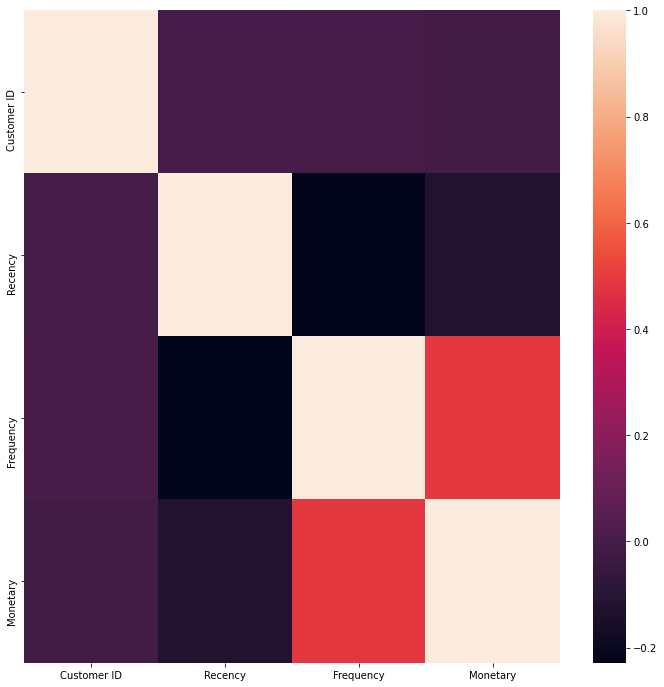

In [77]:
sns.heatmap(RFM_data.corr())


On one hand, we have a negative correlation between:

*   Recency and Frequency
*   Recency and Monetary

On the other hand, the correlation between Monetary and Frequency is positive comparing to negative ones but still not that strong.

**Data Normalization**

In [78]:
#log transformation

rfm_r_log = np.log(RFM_data['Recency']+0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(RFM_data['Frequency'])
rfm_m_log = np.log(RFM_data['Monetary']+0.1)

In [79]:
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})

In [80]:
log_data.head()

,Monetary,Recency,Frequency
0,5.921471,5.100476,3.496508
1,7.187975,0.741937,4.262680
2,5.403848,4.291828,2.995732
3,7.890298,3.740048,4.624973
4,5.707210,2.312535,3.044522



# K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their **silhouette coefficient**. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The **elbow method** can be used to determine the number of clusters as well.

Note: K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called **k-means++**.

In [109]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Scaled_RFM_data = ss.fit_transform(log_data)
Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_data.columns,index=log_data.index)

Text(0.5, 1.0, 'Elbow Techinque to find the optimal cluster size')

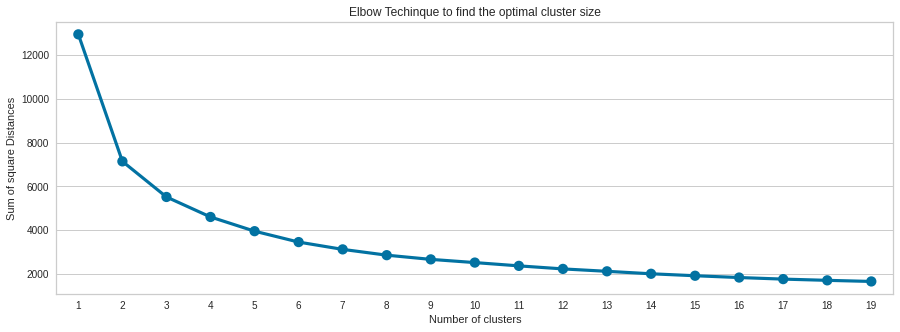

In [110]:
# Will search the optimal number of cluster based on the Elbow Method as below:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(Scaled_RFM_data)
    SS_distance[k] = mod.inertia_

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of square Distances")
plt.title("Elbow Techinque to find the optimal cluster size")

We can observe that as the number of cluster increases the sum of square distance are becoming lesser. And will take the count of cluster where this elbow is bending. In our cases, sum of square distance is dramatically decreasing at K = 4, so this is optimal value to choose for no of clusters.

In [111]:
# Now we will perform K- means clustering on the data set.
KM_clust = KMeans(n_clusters= 4, init = 'k-means++',max_iter = 1000)
KM_clust.fit(Scaled_RFM_data)

# Mapping on the data
RFM_data['Cluster'] = KM_clust.labels_
RFM_data['Cluster'] = 'Cluster' + RFM_data['Cluster'].astype(str)
RFM_data.head()

,Customer ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,Cluster
0,12346.0,164,33,372.86,4,3,3,433,10,Cluster0
1,12347.0,2,71,1323.32,1,2,2,122,5,Cluster3
2,12348.0,73,20,222.16,3,3,4,334,10,Cluster1
3,12349.0,42,102,2671.14,2,1,1,211,4,Cluster2
4,12351.0,10,21,300.93,1,3,4,134,8,Cluster0


Clusters have been created based on the values of recency, frequency and monetary with the help of K-Means Clustering.

**Visualization for Recency, Frequency and Monetory : Cluster Groups
**

In [112]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = 'Recency',y = 'Frequency', color = 'Cluster')
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Frequency', color = 'Cluster')
fig.show()

# Recency V/s Monetary
fig = px.scatter(RFM_data,x = 'Monetary',y = 'Recency', color = 'Cluster')
fig.show()

# Now Apply Silhouette Method

In [81]:
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(log_data)
    clusters = kmeans.predict(log_data)
    silhouette_avg = silhouette_score(log_data, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.37778017808929615
For n_clusters = 3 The average silhouette_score is : 0.32749582666781835
For n_clusters = 4 The average silhouette_score is : 0.27637792185424725
For n_clusters = 5 The average silhouette_score is : 0.29176719086897607
For n_clusters = 6 The average silhouette_score is : 0.2847025984878624
For n_clusters = 7 The average silhouette_score is : 0.2839403998111732
For n_clusters = 8 The average silhouette_score is : 0.2824868180441887
For n_clusters = 9 The average silhouette_score is : 0.2751859397435279


The best silhouette score obtained is when the number of clusters is 2.

In [82]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(log_data)
clusters_customers = kmeans.predict(log_data)
silhouette_avg = silhouette_score(log_data, clusters_customers)
print('score of silhouette: {:<.3f}'.format(silhouette_avg))

score of silhouette: 0.378


Visualize Clusters

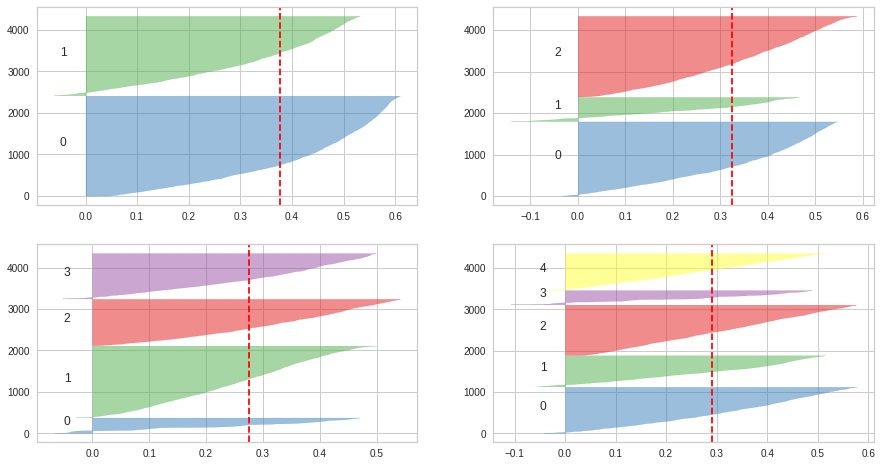

In [86]:
##### Here is the code to create a Silhouette plot for K-Means clusters with n_cluster as 2, 3, 4, 5.
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
### Create KMeans instance for different number of clusters.......
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
###### Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(log_data)